# **Problem Statement :** 
### **CROP RECOMMENDATION BASED ON WEATHER AND SOIL CONTENT**

### **Data fields**
- N - ratio of Nitrogen content in soil - kg/hectare
- P - ratio of Phosphorous content in soil - kg/hectare
- K - ratio of Potassium content in soil - kg/hectare
- temperature - temperature in degree Celsius
- humidity - relative humidity in %
- ph - ph value of the soil
- rainfall - rainfall in mm

In [74]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.simplefilter("ignore", UserWarning)


## **1. Data Overview**

In [75]:
df = pd.read_csv("/content/Crop_recommendation.csv")

In [76]:
df.shape

(2200, 8)

In [77]:
pd.DataFrame(df)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [78]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [79]:
# checking for duplicate row
df.duplicated().any()

False

In [80]:
# checking for null values in the dataset
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


By analysing the dataset, we can conclude that this is a balance dataset with no missing values.

## **2. Exploratery Data analysis**

In [82]:
co_relation=df.corr()
co_relation

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


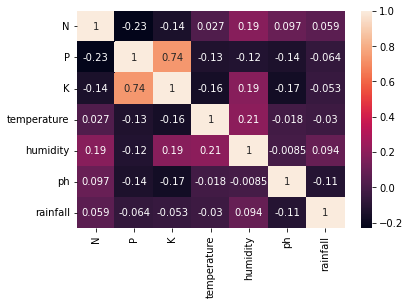

In [83]:
sns.heatmap(co_relation, annot=True)

The Result of the `corr()` method is a table with a lot of numbers that represents how well the relationship is between two columns.

The number varies from -1 to 1.

1 means that there is a 1 to 1 relationship (a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well.

The correlation between Phosphorus and Potassium is 0.74. So we can understand that there is a good relationship and by increasing one value, the other will probably increase as well.

### **2.1 Analysing crops dependency on soil content**

### 2.1.1 N-P-K

Nitrogen, phosphorus and potassium, or NPK, are the “Big 3” primary nutrients in commercial fertilizers. Each of these fundamental nutrients plays a key role in plant nutrition.

In [84]:
df["N"].describe()

count    2200.000000
mean       50.551818
std        36.917334
min         0.000000
25%        21.000000
50%        37.000000
75%        84.250000
max       140.000000
Name: N, dtype: float64

In [85]:
df["P"].describe()

count    2200.000000
mean       53.362727
std        32.985883
min         5.000000
25%        28.000000
50%        51.000000
75%        68.000000
max       145.000000
Name: P, dtype: float64

In [86]:
df["K"].describe()

count    2200.000000
mean       48.149091
std        50.647931
min         5.000000
25%        20.000000
50%        32.000000
75%        49.000000
max       205.000000
Name: K, dtype: float64

### 2.1.2 pH

Text(0.5, 0, 'ph value of the soil')

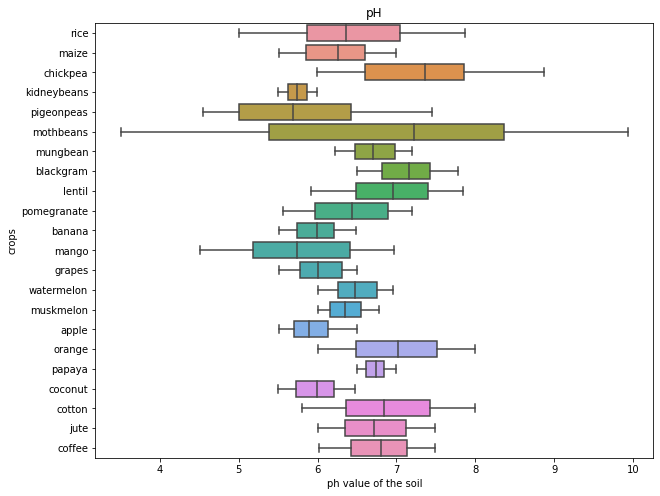

In [87]:
plt.figure(figsize=(10,8))
plt.title("pH")
sns.boxplot(y="label", x="ph", data=df)
plt.ylabel("crops")
plt.xlabel("ph value of the soil")

The study of soil pH is very important in agriculture as that soil pH regulates plant nutrient availability by controlling the chemical forms of the different nutrients and also influences their chemical reactions. As a result, soil and crop productivities are linked to soil pH value. Though soil pH generally ranges from 1 to 14, we can see the optimum range for most  crops is between 5.5 and 7.5. However, some crops have adapted to thrive at soil pH values outside this optimum range like mothbeans.

### **2.2 Analysing crops dependency on weather**

### 2.2.1 Humidity

Text(0.5, 0, 'relative humidity in %')

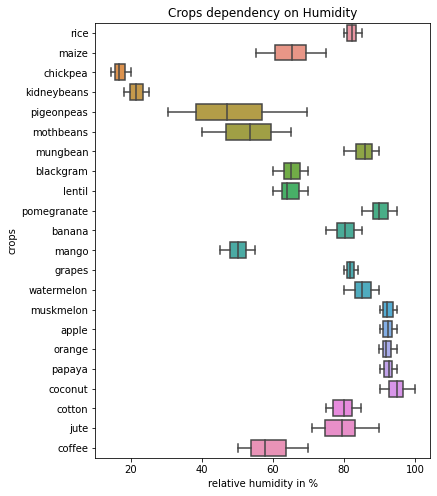

In [88]:
plt.figure(figsize=(6,8))
plt.title("Crops dependency on Humidity") 
sns.boxplot(y="label", x="humidity", data=df) 
plt.ylabel("crops")
plt.xlabel("relative humidity in %")

We can see, crops like chickpea, kidneybeans are grown when the relative humidity is less than 25%, whereas for fruits like apple, orange, papaya high relative humidity is required.

### 2.2.2 Rainfall

Text(0.5, 0, 'rainfall in mm')

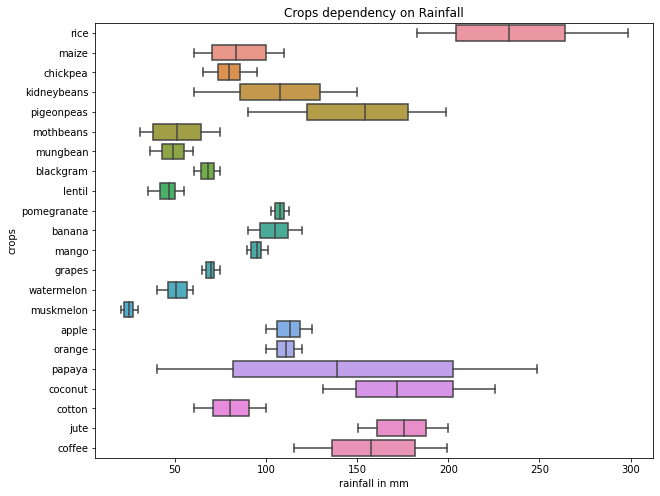

In [89]:
plt.figure(figsize=(10,8)) 
plt.title("Crops dependency on Rainfall") 
sns.boxplot(y="label", x="rainfall", data=df) 
plt.ylabel("crops")
plt.xlabel("rainfall in mm")

We can see for rice the minimum rainfall required is aprox 170mm whereas for grapes the range is 60-70mm.

### 2.2.3 Temperature

Text(0, 0.5, 'crops')

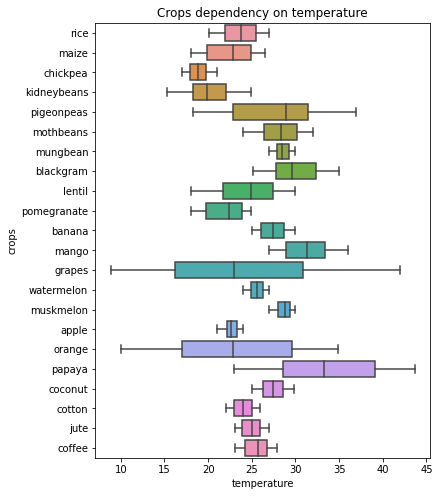

In [90]:
plt.figure(figsize=(6,8))
plt.title("Crops dependency on temperature")
sns.boxplot(y="label", x="temperature", data=df)
plt.ylabel("crops")

Now if we consider the temperature as a parameter, we can see grapes can be caltivated for a wide range of temperature i,e, 10 to 43 degree centigrade temperature. But for most of the crops the required temperature is within 23 to 30 degree centigrade.

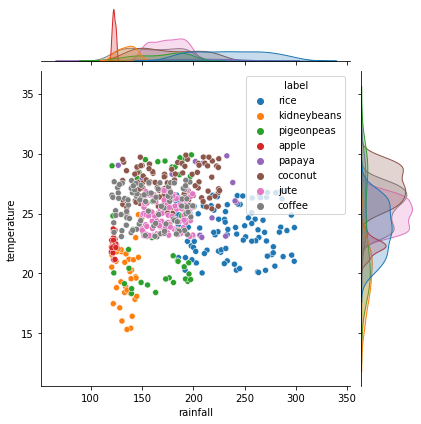

In [91]:
sns.jointplot(x="rainfall",y="temperature",data=df[(df['temperature']<=30) & (df['rainfall']>120)],hue="label")

Rainy Season analyse when average rainfall is greater than 120mm and temperature is within 30 degree. This analyse help us to identify the monsoon crops such as rice,apple, cotton etc.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



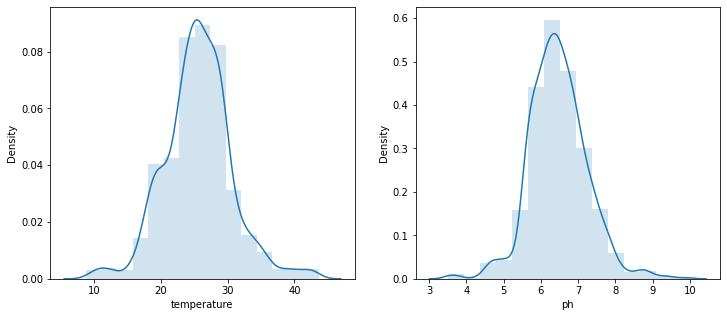

In [92]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
# sns.distplot(df_setosa['sepal_length'],kde=True,color='green',bins=20,hist_kws={'alpha':0.3})
sns.distplot(df['temperature'],bins=15,hist_kws={'alpha':0.2})
plt.subplot(1, 2, 2)
sns.distplot(df['ph'],bins=15,hist_kws={'alpha':0.2})

## **3. Data Preprocessing**

Feature scaling is required before creating training data and feeding it to the model.
As we can see, two of our features (temperature and ph) are gaussian distributed, therefore scaling them between 0 and 1 with MinMaxScaler.

In [93]:
X=df[['N','P','K','temperature','humidity','ph','rainfall']]
y=df.label

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [94]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)

In [95]:
X_train_scaled

array([[0.27857143, 0.37857143, 0.4       , ..., 0.01246358, 0.38756587,
        0.17366   ],
       [0.52142857, 0.28571429, 0.08      , ..., 0.69182458, 0.48707404,
        0.27440633],
       [0.35      , 0.35714286, 0.24      , ..., 0.92591974, 0.47264658,
        0.20659112],
       ...,
       [0.61428571, 0.22142857, 0.095     , ..., 0.68368838, 0.35496049,
        0.19085796],
       [0.05714286, 0.47857143, 0.06      , ..., 0.06321033, 0.34316809,
        0.24310294],
       [0.20714286, 0.14285714, 0.15      , ..., 0.90265703, 0.316954  ,
        0.50483209]])

In [96]:
np.shape(X_train_scaled)

(1760, 7)

In [97]:
np.shape(X_test_scaled)

(440, 7)

## **4. Machine Learning Models**

### Using KNN Classifier

In [98]:
model_knn= KNeighborsClassifier()
model_knn.fit(X_train_scaled, y_train)
model_knn.score(X_test_scaled, y_test)


0.975

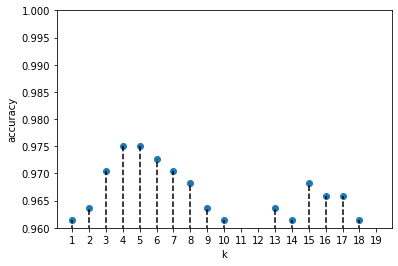

In [99]:
# Let's try different values of n_neighbors to fine tune and get better results

k_range = range(1,20)
scores = []

for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors = k)
    model_knn.fit(X_train_scaled, y_train)
    scores.append(model_knn.score(X_test_scaled, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores, linestyle="dashed")
plt.ylim(0.96,1.0)
plt.xticks([i for i in range(1,20)]);

In [100]:
model_knn= KNeighborsClassifier(n_neighbors=6)
model_knn.fit(X_train_scaled, y_train)
model_knn.score(X_test_scaled, y_test)

print('KNN classifier Accuracy on training data-set: {:.4f}'.format(model_knn.score(X_train_scaled, y_train)))
print('KNN classifier Accuracy on test data-set: {:.4f}'.format(model_knn.score(X_test_scaled, y_test)))

KNN classifier Accuracy on training data-set: 0.9858
KNN classifier Accuracy on test data-set: 0.9727


### Using Support Vector Classifer (SVC)

In [101]:
model_svc= SVC(C=100, gamma=0.001).fit(X_train_scaled, y_train)

print('Support Vector Classifer (SVC) Accuracy on training data-set: {:.4f}'.format(model_svc.score(X_train_scaled, y_train)))
print('Support Vector Classifer (SVC) Accuracy on test data-set: {:.4f}'.format(model_svc.score(X_test_scaled, y_test)))

Support Vector Classifer (SVC) Accuracy on training data-set: 0.7994
Support Vector Classifer (SVC) Accuracy on test data-set: 0.7818


### Using Decision Tree Classifier

In [102]:
model_dt= DecisionTreeClassifier(max_depth=10,random_state=0).fit(X_train, y_train)

print('Decision Tree model Accuracy on training data-set: {:.4f}'.format(model_dt.score(X_train, y_train)))
print('Decision Tree model Accuracy on test data-set: {:.4f}'.format(model_dt.score(X_test, y_test)))

Decision Tree model Accuracy on training data-set: 0.9903
Decision Tree model Accuracy on test data-set: 0.9727


### Using Random Forest Classifier

In [103]:
#  max depth and n_estimator are important to fine tune otherwise trees will be 
# densely graphed which will be a classic case of overfitting. 

# max_depth=5 and n_estimators=10 gives pretty much satisfying results by making sure model is able to generalize well.

model_rf= RandomForestClassifier(max_depth=5,n_estimators=10,random_state=42).fit(X_train, y_train)

print('Random Forest model Accuracy on training data-set: {:.4f}'.format(model_rf.score(X_train, y_train)))
print('Random Forest model Accuracy on test data-set: {:.4f}'.format(model_rf.score(X_test, y_test)))

Random Forest model Accuracy on training data-set: 0.9403
Random Forest model Accuracy on test data-set: 0.9250


### Using Gradient Boosting Classifiers

In [104]:
model_gb = GradientBoostingClassifier(n_estimators=5, max_features=2, random_state=0).fit(X_train, y_train)

print('Gradient Boosting model Accuracy on training data-set: {:.4f}'.format(model_gb.score(X_train, y_train)))
print('Gradient Boosting model Accuracy on test data-set: {:.4f}'.format(model_gb.score(X_test, y_test)))

Gradient Boosting model Accuracy on training data-set: 0.9841
Gradient Boosting model Accuracy on test data-set: 0.9614


## **5. Conclusion**


In [105]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "HyperParameters used",  "Train accuracy", "Test accuracy"]

x.add_row(["KNN Classifier", "k parameter", 0.9852, 0.9795])
x.add_row(["SVC", "C parameter", 0.7937, 0.7659])
x.add_row(["Decision Tree", "max_depth" , 0.9892, 0.9841])
x.add_row(["Random Forest Classifier", "max_depth,n_estimators", 0.9756, 0.9523])
x.add_row(["Gradient Boosting", "n_estimators, max_features", 0.9835, 0.9705])

print(x)

+--------------------------+----------------------------+----------------+---------------+
|          Model           |    HyperParameters used    | Train accuracy | Test accuracy |
+--------------------------+----------------------------+----------------+---------------+
|      KNN Classifier      |        k parameter         |     0.9852     |     0.9795    |
|           SVC            |        C parameter         |     0.7937     |     0.7659    |
|      Decision Tree       |         max_depth          |     0.9892     |     0.9841    |
| Random Forest Classifier |   max_depth,n_estimators   |     0.9756     |     0.9523    |
|    Gradient Boosting     | n_estimators, max_features |     0.9835     |     0.9705    |
+--------------------------+----------------------------+----------------+---------------+


At the end of our modeling step, we built five models: Random Forest Classifier, Decision Tree Classifier, Gradient Boosting Classifiers,  KNN Classifier, Support Vector Classifer (SVC). We noticed that Decision Tree gave us the best result compare to the other four models.

In [106]:
prediction=model_dt.predict([[90, 42, 43, 20.879744, 75, 5.5,220]])
prediction

array(['rice'], dtype=object)